# Pymaceuticals Inc.




In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# added later for linregress
from scipy.stats import linregress

In [3]:
# Study data files path
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the csv files(mouse data and the study results)
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [5]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [8]:
# Combine the data into a single dataset
merge_mouse_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
# Display the data table for preview
merge_mouse_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [9]:
# Checking the number of mice.
mouse_count = merge_mouse_df["Mouse ID"].nunique()
mouse_count

249

In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicate = merge_mouse_df.loc[merge_mouse_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mouse_duplicate

array(['g989'], dtype=object)

In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dupes = merge_mouse_df[merge_mouse_df['Mouse ID'].isin(mouse_duplicate)]
mouse_dupes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean = merge_mouse_df[merge_mouse_df['Mouse ID'] != 'g989'].copy()
mouse_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [17]:
# Checking the number of mice in the clean DataFrame.
mouse_nunique = mouse_clean["Mouse ID"].nunique()
mouse_nunique

248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = mouse_clean.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = mouse_clean.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = mouse_clean.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stdv = mouse_clean.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
ster = mouse_clean.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]


# Assemble the resulting series into a single summary DataFrame.

mouse_summary_stats = pd.DataFrame(
    {
        "Mean Tumor Volume" : mean,
        "Median Tumor Volume" : median,
        "Tumor Volume Variance" : variance,
        "Tumor Volume Std. Dev" : stdv,
        "Tumor Volume Std. Err." : ster
        
    }
)
mouse_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
mouse_aggregate = mouse_clean.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})
mouse_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_group = mouse_clean.groupby(["Drug Regimen"]).count()["Timepoint"]
timepoint_group


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

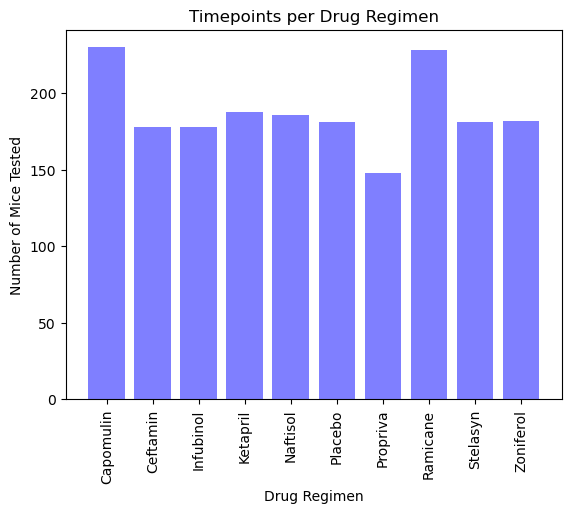

Text(0, 0.5, 'Number of Mice Tested')

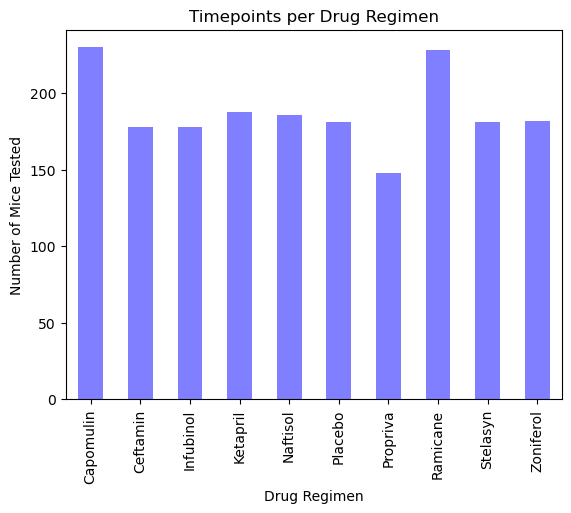

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(timepoint_group.index, timepoint_group, color="blue", alpha=.5)
plt.xticks(timepoint_group.index, rotation="vertical")
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

# same bar chart using pandas
timepoint_group.plot(kind="bar", color="blue", alpha=.5)
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

([<matplotlib.patches.Wedge at 0x7f7c34fc58e0>,
 [Text(-0.03608946990830779, 1.1994571897995099, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.021052190779846207, 0.6996833607163808, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

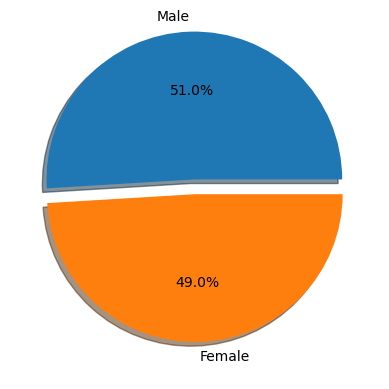

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = mouse_clean["Sex"].value_counts()
explode = (0.1, 0)
plt.pie(sex_count.values, labels=sex_count.index, explode = explode, autopct='%1.1f%%', 
        shadow=True, startangle=0)


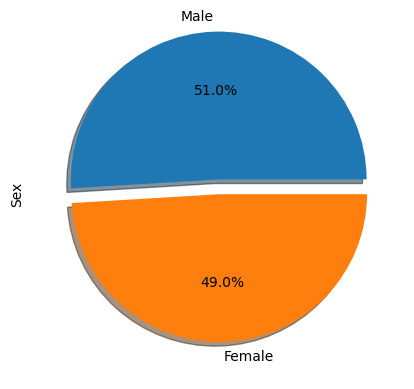

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count.plot(kind="pie", explode = explode, autopct='%1.1f%%', 
        shadow=True, startangle=0)
plt.show()


## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume = []

# for loop to grab the tumor volumes and quaritle ranges for each of the four drugs
for drug in regimens:
    final_tumor_vol = merge_timepoint.loc[merge_timepoint["Drug Regimen"] == drug, 
                                          'Tumor Volume (mm3)']
    tumor_volume.append(final_tumor_vol)
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{drug}'s' potential outliers: <{lower_bound} and >{upper_bound}")


# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = mouse_clean.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_timepoint = max_timepoint.merge(mouse_clean, on=["Mouse ID", "Timepoint"], how="left")
merge_timepoint

Capomulin's' potential outliers: <20.70456164999999 and >51.83201549
Ramicane's' potential outliers: <17.912664470000003 and >54.30681135
Infubinol's' potential outliers: <36.83290494999999 and >82.74144559000001
Ceftamin's' potential outliers: <25.355449580000002 and >87.66645829999999


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [39]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
    

for drug in regimens:
    final_tumor_vol = merge_timepoint.loc[merge_timepoint["Drug Regimen"] == drug, 
                                          'Tumor Volume (mm3)']
    tumor_volume.append(final_tumor_vol)
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{drug}'s' potential outliers: <{lower_bound} and >{upper_bound}")
        
   


Capomulin's' potential outliers: <20.70456164999999 and >51.83201549
Ramicane's' potential outliers: <17.912664470000003 and >54.30681135
Infubinol's' potential outliers: <36.83290494999999 and >82.74144559000001
Ceftamin's' potential outliers: <25.355449580000002 and >87.66645829999999


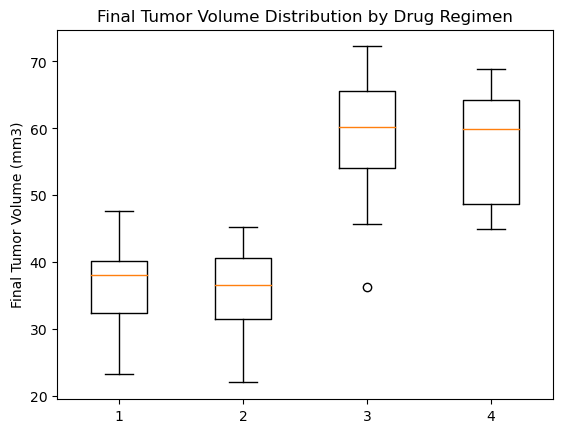

In [40]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume)
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                   linestyle='none', markeredgecolor='g')
plt.title("Final Tumor Volume Distribution by Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

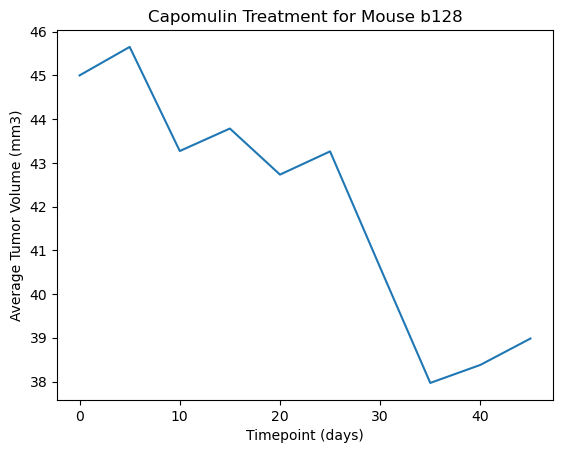

In [41]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_study = mouse_clean.loc[mouse_clean["Drug Regimen"] == "Capomulin"]
one_mouse = capomulin_study.loc[capomulin_study["Mouse ID"] == "b128"]

plt.plot(one_mouse["Timepoint"], one_mouse["Tumor Volume (mm3)"])

plt.title("Capomulin Treatment for Mouse b128")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")

plt.show()


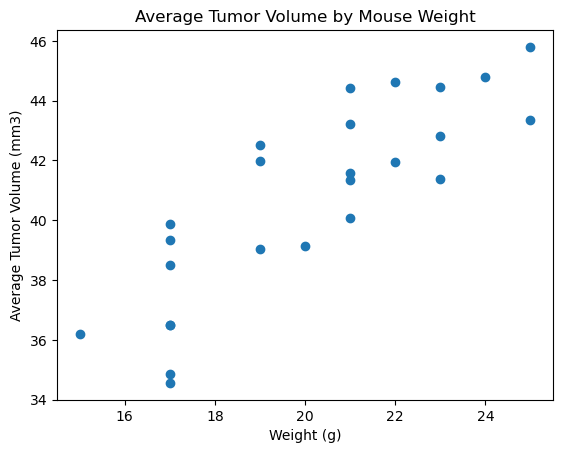

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg = capomulin_study.groupby("Mouse ID").mean()

plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])

plt.title("Average Tumor Volume by Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.7088568047708723


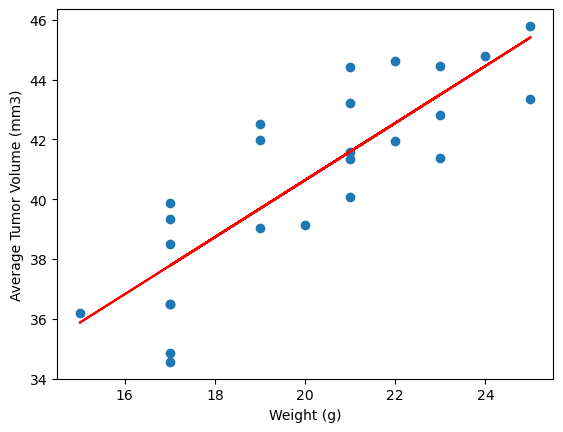

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capomulin_avg["Weight (g)"]
y_values = capomulin_avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
print(f"The correlation between mouse weight and the average tumor volume is {rvalue**2}")
plt.show()